In [2]:
import numpy as np

## 1 Preparation

### What is the purpose of an activation function in NN in general

First, let's quickly recap: Neural Networks are networks of neurons. Each neuron receives potentials from other neurons (or other sources, e.g. photoreceptors), which influence its own potential. This potential needs to reach a certain *threshold* to "fire" again, i.e. to send the signal forward. In general, the task of the *threshold* is to differentiate between *noise* and important *stimulus*.  
Conceptually, a neuron in an ANN serves the same purpose: *Sum up incoming information, decide whether the input is noise or stimulus and decide to fire*. This is all encompassed by the activation function. 

### What's the advantage of e.g. sigmoid over the step function (threshold function)

Step function: $$\sigma(x) := y = \begin{cases} 1\text{ for }x\geq 0 \\ 0 \text{ for } x < 0 \end{cases}$$  
(see sigmoid below)  
In a nut shell, while the step function is biologically motivated and simple to implement, the big disadvantage is that it's derivative is 0 everywhere. Since we need a derivative for our gradient descent approach to optimization, we should choose an activtion function that's derivative contains valuable information: A very popular alternative is the sigmoid function. Another advantage is that the sigmoid function also adheres to the *Universal Approximation Theorem*, which in summary just states that an MLP with one hidden layer can approximate any (real) function given enough neurons in this hidden layer. Neat. 

### What does sigmoid look like (the formula as well as the graph)?

Sigmoid: $$\sigma(x) = \frac{1}{1+e^{-x}}$$  
For Sigmoid-prime (derivative), see below. 
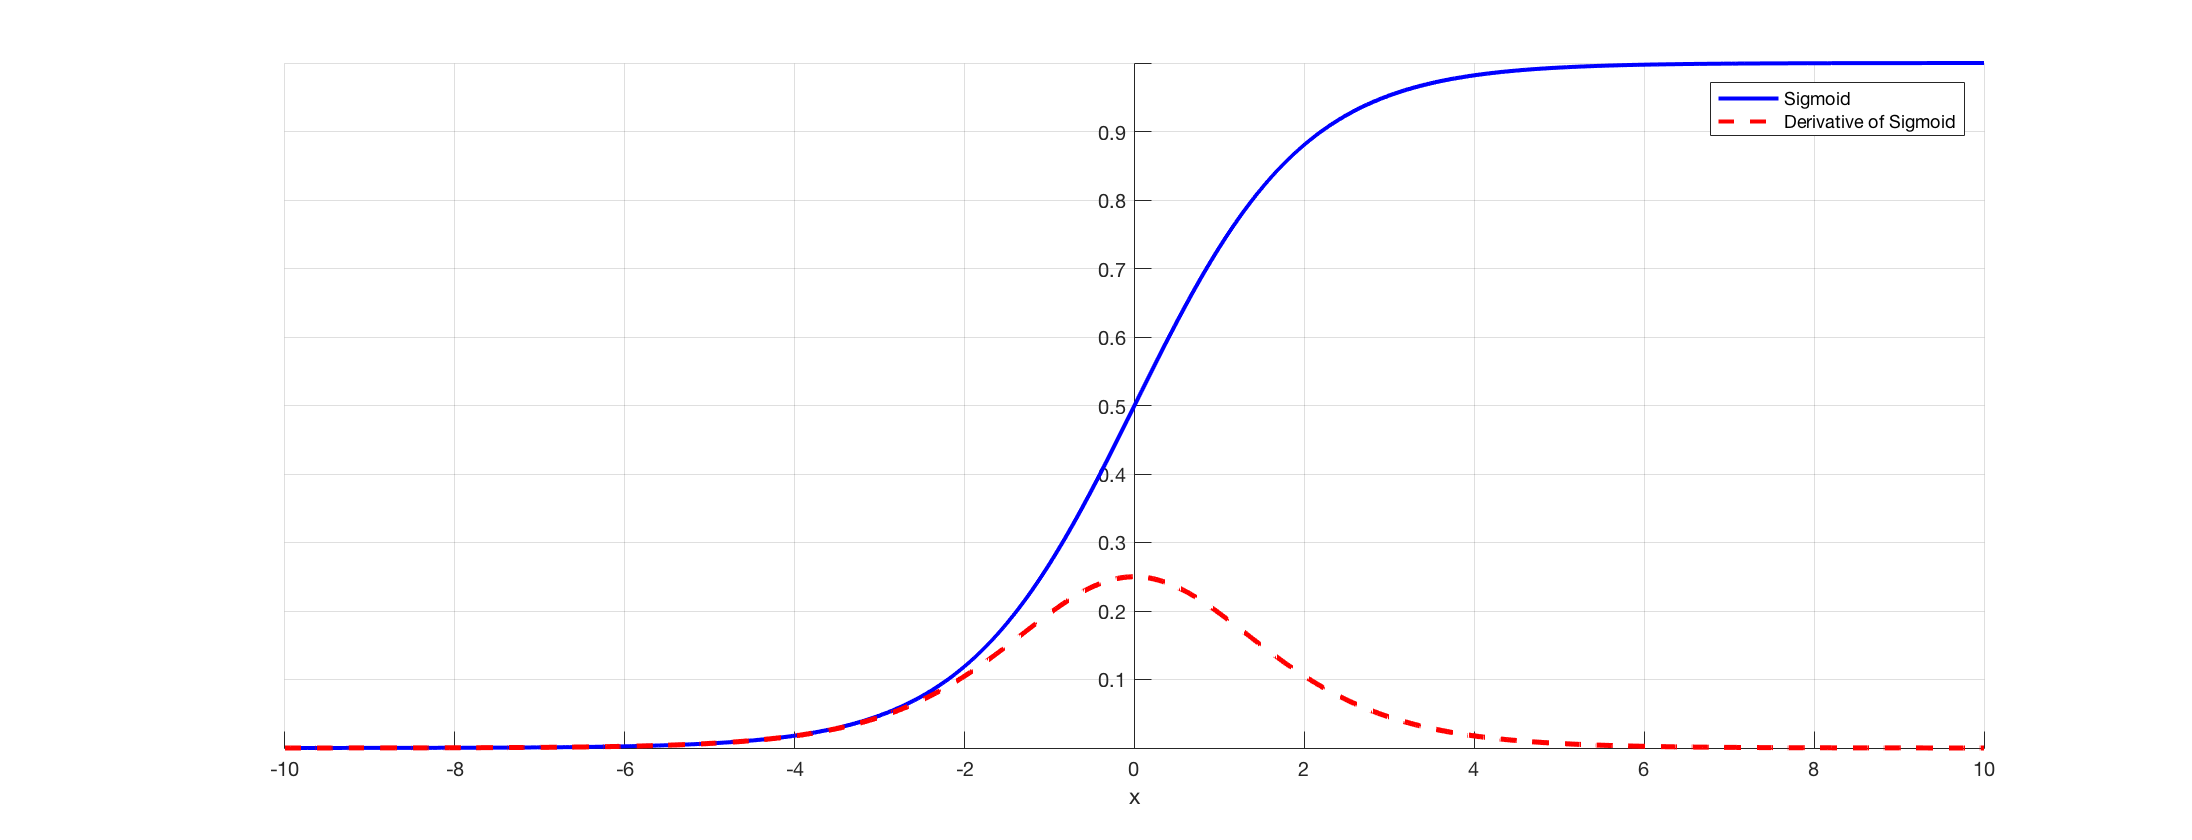

### What is the derivative of sigmoid 

$$\frac{d}{dx} \sigma=\sigma'(x) = \sigma(x)(1-\sigma(x))$$

In [3]:
# Super simple sigmoid, no error handling, using the already importet numpy exponent 
# function instead of loading the extra python math module. 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [4]:
# Simply using the above definition of sigmoidprime and our priorly defined sigmoid function.
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

## 2 Data set

In [5]:
data = np.array([[0,0],[0,1],[1,0],[1,1]]) # permutate all posibilities
# Correct labels for all 5 logic tasks 
lab_and = np.array([0,0,0,1])
lab_or = np.array([0,1,1,1])
lab_notand = np.array([1,1,1,0])
lab_notor = np.array([1,0,0,0])
lab_xor = np.array([0,1,1,0])

## 3 Perceptron 

In [71]:
# Perceptron from flipped classroom
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 0.01.
        self.alpha = 0.1
        
    def forward_step(self, input):
        self.input = input
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        weighted_sum =  self.weights @ input + self.bias 
        # An alternative would be:
        # weighted_sum =  np.dot(input, self.weights) + self.bias
        return sigmoid(weighted_sum)
        
    def update(self, delta):
      
        self.gradient = delta * self.input_units
       
        self.weights = self.weights - self.alpha *self.gradient
        
        
    

## 5 Multi-Layer-Perceptron

In [90]:
class MLP():
    def __init__(self, nPerc, nInputs):
        self.hidden = np.array([Perceptron(nInputs) for i in range(nPerc)])
        self.outputPerc = Perceptron(nPerc)
    
    def forward_step(self, sample):
        self.hiddenLayerOutput = [perc.forward_step(sample) for perc in self.hidden]
        self.output = self.outputPerc.forward_step(self.hiddenLayerOutput)
        
    def backprop_step(self, label):
        errorOutput = -(self.output-label)*sigmoidprime(sum(self.hiddenLayerOutput))
        for perc in self.hidden:
            error = np.sum(errorOutput) * perc.weights * sigmoidprime(sum(perc.input))
            perc.update(error)
        self.outputPerc.update(errorOutput)
        
    def training_step(self, sample, label):
        self.forward_step(sample)
        self.backprop_step(label)

In [100]:

def train(nPerc,inputs_units,epochs, data, labels):
    mlp = MLP(nPerc,inputs_units)
    accList = []
    lossList = []
    for i in range(0,epochs):
        print(f"Epoch {i}")
        accuracy = 0
        loss = 0
        for j in range(0,len(data)):
            mlp.training_step(data[j], labels[j])
            accuracy += 1 if (mlp.output < 0.5 and labels[j] == 0) or (mlp.output >= 0.5 and labels[j] == 1) else 0
            loss += (mlp.output - labels[j])**2
        accList.append(accuracy/4)
        lossList.append(loss/4)
    return mlp, accList, lossList

trainedMLP, accList, lossList = train(4,2,1000,data, lab_and)
print(loss)

    

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


c:\users\louis\anaconda3\envs\ainnwtf\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.



Epoch 495
Epoch 496
Epoch 497
Epoch 498
Epoch 499
Epoch 500
Epoch 501
Epoch 502
Epoch 503
Epoch 504
Epoch 505
Epoch 506
Epoch 507
Epoch 508
Epoch 509
Epoch 510
Epoch 511
Epoch 512
Epoch 513
Epoch 514
Epoch 515
Epoch 516
Epoch 517
Epoch 518
Epoch 519
Epoch 520
Epoch 521
Epoch 522
Epoch 523
Epoch 524
Epoch 525
Epoch 526
Epoch 527
Epoch 528
Epoch 529
Epoch 530
Epoch 531
Epoch 532
Epoch 533
Epoch 534
Epoch 535
Epoch 536
Epoch 537
Epoch 538
Epoch 539
Epoch 540
Epoch 541
Epoch 542
Epoch 543
Epoch 544
Epoch 545
Epoch 546
Epoch 547
Epoch 548
Epoch 549
Epoch 550
Epoch 551
Epoch 552
Epoch 553
Epoch 554
Epoch 555
Epoch 556
Epoch 557
Epoch 558
Epoch 559
Epoch 560
Epoch 561
Epoch 562
Epoch 563
Epoch 564
Epoch 565
Epoch 566
Epoch 567
Epoch 568
Epoch 569
Epoch 570
Epoch 571
Epoch 572
Epoch 573
Epoch 574
Epoch 575
Epoch 576
Epoch 577
Epoch 578
Epoch 579
Epoch 580
Epoch 581
Epoch 582
Epoch 583
Epoch 584
Epoch 585
Epoch 586
Epoch 587
Epoch 588
Epoch 589
Epoch 590
Epoch 591
Epoch 592
Epoch 593
Epoch 594

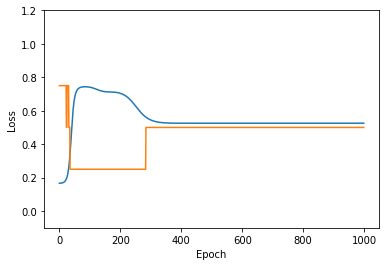

In [101]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(lossList)
plt.plot(accList)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

In [76]:
loss[1][0]

0.023164433205934545